In [8]:
import pandas
import matplotlib
import matplotlib.pyplot as pyplot
import seaborn
%matplotlib inline


In [7]:
# Список переменных:
# dataFrame - основной датафрейм
# unbalanced - датафрейм - несбалансированные ткани
# balanced - датафрейм - сбалансированные ткани
# narrow_bands - датафрейм, узкие бинты
# middle_bands - датафрейм, средние бинты
# wide_bands - датафрейм, широкие бинты


In [9]:
dataFrame = pandas.read_csv('./dataframe.csv')
dataFrame = pandas.DataFrame(dataFrame[
    ['grave', 'internal_storage', 'size_warp', 'size_weft', 'type', 'condition', 'weaving_technique',
     'warp_material', 'weft_material', 'warp_dyed', 'weft_dyed', 'twist_warp', 'twist_weft', 'angle_warp', 'angle_weft',
     'warp_a', 'warp_b', 'weft_a', 'weft_b', 'warp_dens', 'weft_dens']
])


# Приводит тип колонки в csv файле к типу float в DataFrame;
def convert_to_float(value):
    value = str(value)
    value = value.replace(",", ".")
    value = round(float(value), 2)
    return value
    
    
# явно приводим типы столбцов таблицы;
dataFrame['warp_a'] = dataFrame.warp_a.apply(convert_to_float)
dataFrame['warp_b'] = dataFrame.warp_b.apply(convert_to_float)
dataFrame['weft_a'] = dataFrame.weft_a.apply(convert_to_float)
dataFrame['weft_b'] = dataFrame.weft_b.apply(convert_to_float)

# рассчет средних занчений толщин нитей по основе и по утку;
# получаемые значения округляются до 2 знаков после запятой;
dataFrame['warp_mean'] = round((dataFrame['warp_a'] + dataFrame['warp_b']) / 2, 2)
dataFrame['weft_mean'] = round((dataFrame['weft_a'] + dataFrame['weft_b']) / 2, 2)

# "Коэффициент плотности" - соотношение плотности по основе к плотности по утку;
dataFrame['density_coefficient'] = round(dataFrame['warp_dens'] / dataFrame['weft_dens'], 2)
#print(dataFrame)


In [55]:
# Выборкаданных из одготовленного датафрейма;
# Предполагается, что для сбалансированных тканей разница между плотностью
# по основе и плотностью по утку не должна превышать 3 единиц;
balanced = dataFrame[abs(dataFrame['warp_dens'] - dataFrame['weft_dens']) <= 3]
unbalanced = dataFrame[abs(dataFrame['warp_dens'] - dataFrame['weft_dens']) > 3]
narrow_bands = dataFrame[dataFrame['type'] == 'n_band']
middle_bands = dataFrame[dataFrame['type'] == 'm_band']
wide_bands = dataFrame[dataFrame['type'] == 'w_band']
# print(narrow_bands)


In [11]:
dataFrame.to_csv('results/finalFrame.csv')
balanced.to_csv('results/balanced.csv')
unbalanced.to_csv('results/unbalanced.csv')


(array([ 1.,  3.,  0.,  1.,  6., 13.,  8.,  7.,  0.,  8.]),
 array([0.88 , 0.952, 1.024, 1.096, 1.168, 1.24 , 1.312, 1.384, 1.456,
        1.528, 1.6  ]),
 <a list of 10 Patch objects>)

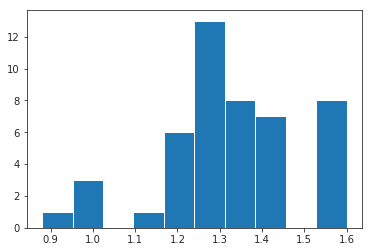

In [45]:
# matplotlib charts
pyplot.hist(balanced['density_coefficient'])
#pyplot.hist(unbalanced['density_coefficient'])


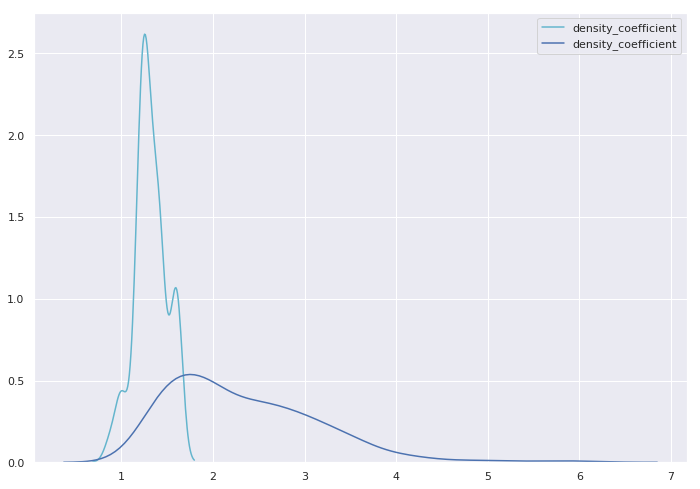

In [50]:
seaborn.set_style("whitegrid")
seaborn.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
seaborn.set(rc={'figure.figsize': (11.7,8.27)})
densities_balanced = seaborn.kdeplot(balanced['density_coefficient'], color='c')
densities_unbalanced = seaborn.kdeplot(unbalanced['density_coefficient'], color='b')


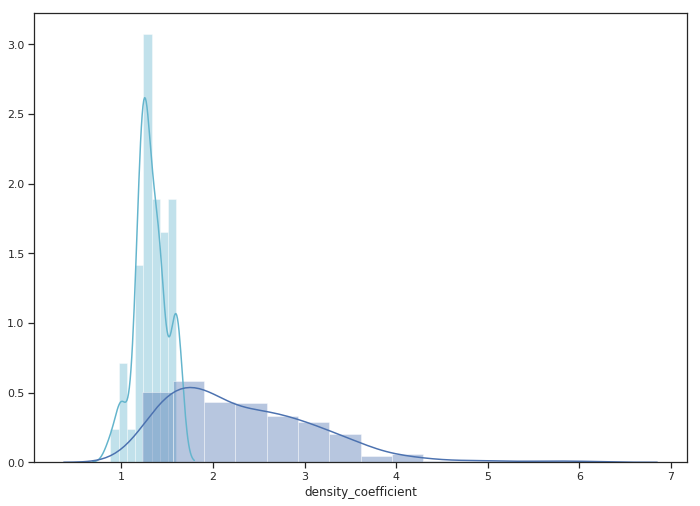

In [51]:
# seaborn charts
seaborn.set_style("whitegrid")
seaborn.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
densities_balanced = seaborn.distplot(balanced['density_coefficient'], kde=True, color='c')
densities_unbalanced = seaborn.distplot(unbalanced['density_coefficient'], kde=True, color='b')
